<a href="https://colab.research.google.com/github/z1gyy/Air-Pollution-map/blob/main/Bakalarka.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [314]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import openpyxl
from collections import Counter
from google.colab import files

In [315]:
import pandas as pd
import openpyxl
from google.colab import files

class SurveyDataLoader:
    def __init__(self, file_path):
        self.file_path = file_path
        self.records = []

    def load_data(self):
        """Načte data z Excelu a uloží je jako seznam záznamů (ID, odpovědi)."""
        try:
            wb = openpyxl.load_workbook(self.file_path)
            sheet = wb['Data']
        except (FileNotFoundError, KeyError) as e:
            print(f"Chyba při načítání souboru: {e}")
            return []

        headers = [cell.value for cell in sheet[1]]

        try:
            id_col = headers.index('ID')  # Ujisti se, že ID existuje
        except ValueError:
            print("ID sloupec nebyl nalezen!")
            return []

        rating_cols = list(range(1, 8))  # Indexy sloupců s odpověďmi

        for row in sheet.iter_rows(min_row=2, values_only=True):
            record_id = row[id_col]
            ratings = [row[i] if isinstance(row[i], (int, float)) else None for i in rating_cols]

            if record_id and all(rating is not None for rating in ratings):
                self.records.append([record_id] + ratings)  # Rozbalíme seznam odpovědí

        return self.records

    def prepare_data(self):
        """Převede záznamy na Pandas DataFrame pro další analýzy."""
        if not self.records:
            print("Žádná data k zpracování!")
            return pd.DataFrame()

        num_questions = len(self.records[0]) - 1
        columns = ['ID'] + [f'Q{i+1}' for i in range(num_questions)]

        df = pd.DataFrame(self.records, columns=columns)  # Správná struktura

        # Volitelná úprava: pokud potřebujeme binární reprezentaci
        df_encoded = pd.get_dummies(df.set_index('ID'))  # One-hot encoding pro kategoriální hodnoty

        return df, df_encoded

# ✅ Načtení souboru a příprava dat
uploaded = files.upload()
file_path = list(uploaded.keys())[0]

data_loader = SurveyDataLoader(file_path)
records = data_loader.load_data()

df, df_encoded = data_loader.prepare_data()

# 🔹 Ukázka výsledku
print("📊 Původní DataFrame:")
print(df)

print("\n🔹 One-hot encoded DataFrame:")
print(df_encoded)


Saving dotaznik_FEI_cisty.xlsx to dotaznik_FEI_cisty (16).xlsx
📊 Původní DataFrame:
                 ID  Q1  Q2  Q3  Q4  Q5  Q6  Q7
0      Respondent_1   2   1   1   5   1   1   1
1      Respondent_2   1   1   2   3   1   1   2
2      Respondent_3   1   1   1   1   1   1   1
3      Respondent_4   2   2   3   4   2   1   2
4      Respondent_5   5   4   4   2   5   5   5
..              ...  ..  ..  ..  ..  ..  ..  ..
378  Respondent_379   2   1   1   1   1   1   1
379  Respondent_380   1   1   1   1   1   1   1
380  Respondent_381   3   5   2   4   3   3   4
381  Respondent_382   2   2   2   2   2   2   2
382  Respondent_383   1   1   1   3   1   1   1

[383 rows x 8 columns]

🔹 One-hot encoded DataFrame:
                Q1  Q2  Q3  Q4  Q5  Q6  Q7
ID                                        
Respondent_1     2   1   1   5   1   1   1
Respondent_2     1   1   2   3   1   1   2
Respondent_3     1   1   1   1   1   1   1
Respondent_4     2   2   3   4   2   1   2
Respondent_5     5   4   4  

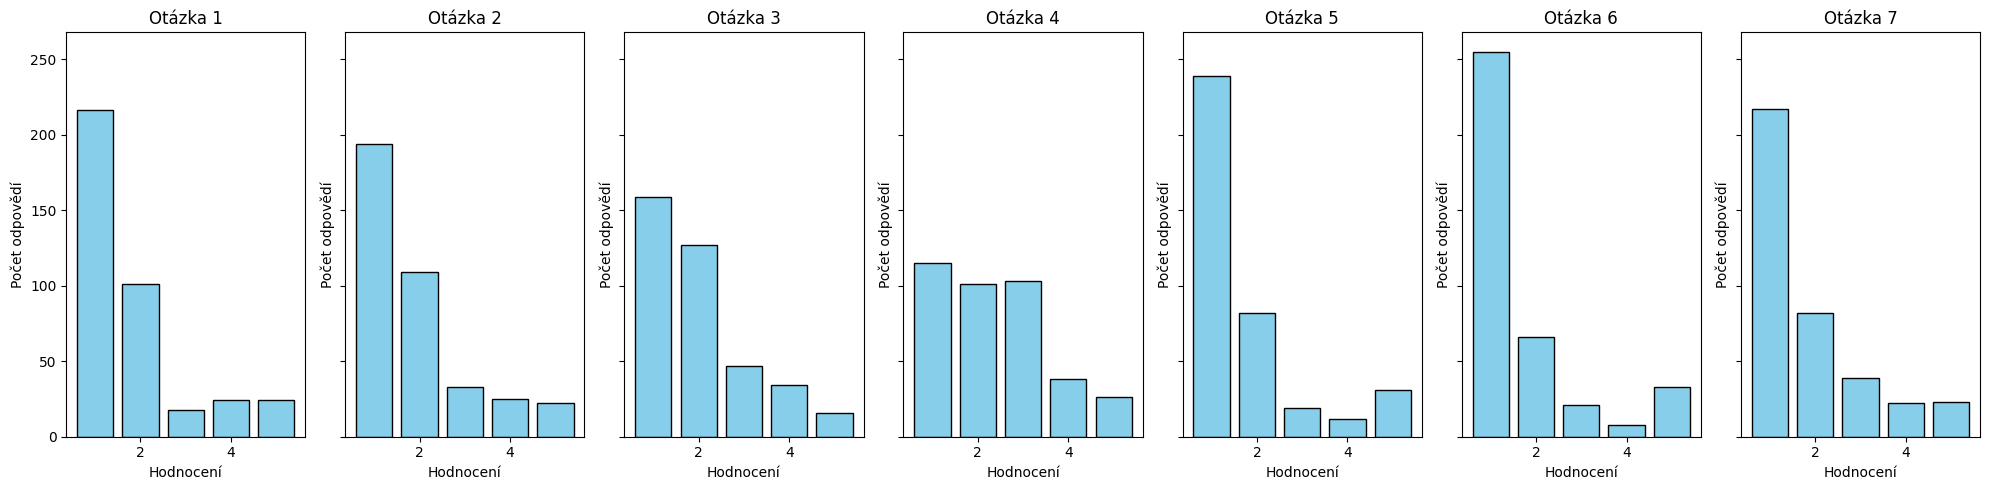

In [316]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

class SurveyDataVisualizer:
    def __init__(self, records):
        if not records:
            raise ValueError("Dataset is prázdný!")

        self.df = pd.DataFrame(records, columns=['ID'] + [f'Q{i+1}' for i in range(len(records[0]) - 1)])
        self.df.set_index('ID', inplace=True)

    def plot_distribution(self):
        """Vykreslí distribuci odpovědí pro každou otázku."""
        num_questions = self.df.shape[1]
        fig, axes = plt.subplots(nrows=1, ncols=num_questions, figsize=(20, 5), sharey=True)

        for i, col in enumerate(self.df.columns):
            counts = Counter(self.df[col].dropna())  # Počet výskytů hodnocení
            labels, values = zip(*sorted(counts.items()))

            ax = axes[i] if num_questions > 1 else axes
            ax.bar(labels, values, color='skyblue', edgecolor='black')
            ax.set_title(f'Otázka {i+1}')
            ax.set_xlabel('Hodnocení')
            ax.set_ylabel('Počet odpovědí')

        plt.tight_layout()
        plt.show()

# ✅ Použití
visualizer = SurveyDataVisualizer(records)
visualizer.plot_distribution()


# 🔹 Metody?

1️⃣ AVF (Attribute Value Frequency)
Metoda AVF identifikuje anomálie na základě frekvence jednotlivých hodnot atributů. Pozorování s nejnižším průměrným skóre jsou považována za anomálie.

2️⃣ HoloEntropy-Based Detection
HoloEntropy kombinuje Shannonovu entropii a celkovou korelaci mezi atributy k identifikaci anomálií.

3️⃣ FP-Outlier (Frequent Pattern Outlier)
FP-Outlier detekuje anomálie pomocí analýzy častých vzorů v datech.

# 🔹 Odlehlá pozorování

Úvod k odlehlým pozorováním v kategoriálních datech
V analýze dat jsou odlehlá pozorování (outliers) záznamy, které se výrazně liší od většiny ostatních hodnot. Zatímco v numerických datech lze anomálie snadno detekovat pomocí metrik, jako je průměr a směrodatná odchylka, v kategoriálních datech je tento proces složitější. Kategoriální data nemají přirozený řád ani měřitelnou vzdálenost mezi hodnotami, což ztěžuje použití tradičních metod detekce anomálií.

Odlehlá pozorování v kategoriálních datech lze chápat jako vzácné nebo neobvyklé kombinace kategorií. Například ve dotazníkovém šetření by mohla být anomální odpověď, která obsahuje kombinaci velmi nepravděpodobných odpovědí. Tato pozorování mohou být způsobena chybami při zadávání dat, specifickým chováním respondentů, nebo mohou naznačovat důležité trendy v analyzovaných datech.

Metody detekce odlehlých pozorování v kategoriálních datech se zaměřují na vzory výskytu jednotlivých hodnot a jejich kombinací. Nejčastěji se využívají:

Frekvenční metody (např. Attribute Value Frequency, FP-Outlier) – hodnotí, jak často se jednotlivé kategorie vyskytují.
Shlukovací metody (např. k-modes, ROCK) – hledají neobvyklé shluky pozorování.
Informačně-teoretické přístupy (např. HoloEntropy) – měří změny entropie v datech.
Pravidlové metody (např. detekce pomocí asociačních pravidel) – identifikují nepravděpodobné kombinace atributů.
Správná detekce odlehlých pozorování je klíčová pro čištění dat, odhalování podvodů, zlepšení kvality rozhodování a odhalení skrytých vzorů v datasetu.

# 🔹 Jak AVF funguje?
Pro každý objekt \( x_i \) se spočítá průměrná četnost kategorií, které obsahuje:

\[
AVF(x_i) = \frac{1}{q} \sum_{j=1}^{q} f(x_{ij})
\]

kde:
- \( q \) je počet kategoriálních atributů,
- \( f(x_{ij}) \) je četnost hodnoty \( x_{ij} \) v rámci proměnné \( X_j \) v celém datasetu.

### 📌 Interpretace:
- **Nízké AVF skóre** → Objekt obsahuje vzácné hodnoty → **pravděpodobně anomálie**.
- **Vysoké AVF skóre** → Objekt má běžné hodnoty → **Normální záznam**.

---

# 🔹 Jak funguje IQR při detekci outlierů?
Interkvartilové rozpětí (**IQR**) se definuje jako rozdíl mezi **Q3 (75. percentil)** a **Q1 (25. percentil)**:

\[
IQR = Q3 - Q1
\]

Klasická definice považuje za **outliery** hodnoty, které jsou:
- **Nižší než**: \( Q1 - 1.5 \times IQR \)
- **Vyšší než**: \( Q3 + 1.5 \times IQR \)

Tento faktor **1.5** je **konvenční hodnota**, ale můžeš ji **změnit** pro přísnější nebo volnější detekci.

---

# 🔹 Co se stane, když měním rozpětí?
✅ **Nižší hodnota** *(např. 1.0× IQR)* → **Méně přísná detekce**, zachytí jen extrémní outliery.  
✅ **Vyšší hodnota** *(např. 2.0× IQR)* → **Přísnější detekce**, označí více hodnot jako outliery.  
✅ **Extrémní hodnoty** *(např. 3.0× IQR)* → **Velmi přísná detekce**, může označit i relevantní data jako outliery.

---

In [317]:
from collections import Counter
import numpy as np
import pandas as pd

class AVFOutlierDetector:
    def __init__(self, records, iqr_multiplier=1.5, zscore_threshold=2):
        if not records:
            raise ValueError("Dataset je prázdný!")

        self.df = pd.DataFrame(records, columns=['ID'] + [f'Q{i+1}' for i in range(len(records[0]) - 1)])
        self.df.set_index('ID', inplace=True)
        self.iqr_multiplier = iqr_multiplier
        self.zscore_threshold = 2 # Hranice pro z-skóre (např. 3 znamená považovat za outlier vše nad 3 nebo pod -3)

    def compute_avf_scores(self):
        """Spočítá AVF skóre pro každého respondenta."""
        question_frequencies = {col: self.df[col].value_counts().to_dict() for col in self.df.columns}
        avf_scores = self.df.apply(lambda row: np.mean([question_frequencies[col].get(row[col], 0) for col in self.df.columns]), axis=1)
        return avf_scores, question_frequencies

    def detect_low_outliers(self):
        """Použije metodu IQR k detekci pouze nízkých AVF skóre."""
        avf_scores, _ = self.compute_avf_scores()
        Q1, Q3 = np.percentile(avf_scores, [25, 75])
        IQR = Q3 - Q1
        lower_bound = Q1 - self.iqr_multiplier * IQR
        outliers = avf_scores[avf_scores < lower_bound]
        return outliers, lower_bound

    def compute_zscores(self):
        """Spočítá z-skóre pro AVF skóre a detekuje outliery podle z-skóre."""
        avf_scores, _ = self.compute_avf_scores()
        mean = np.mean(avf_scores)
        std_dev = np.std(avf_scores)
        zscores = (avf_scores - mean) / std_dev
        z_outliers = {record_id: score for record_id, score in zscores.items() if abs(score) > self.zscore_threshold}
        return zscores, z_outliers

    def print_avf_results(self):
        """Vypíše AVF skóre a procentuální zastoupení odpovědí s barevným označením kategorií, seřazené podle AVF."""
        avf_scores, question_frequencies = self.compute_avf_scores()
        outliers, lower_bound = self.detect_low_outliers()
        zscores, z_outliers = self.compute_zscores()

        print(f"\n📌 \033[1;34mSpodní hranice pro outliery (IQR):\033[0m < {lower_bound:.2f}")
        print("📌 Detekované outliery podle AVF a IQR:")
        for record_id, score in outliers.items():
            print(f"   - ID: {record_id}, AVF Skóre: {score:.2f}")

        print(f"\n📌 Detekované outliery podle z-skóre (|z| > {self.zscore_threshold}):")
        for record_id, zscore in z_outliers.items():
            print(f"   - ID: {record_id}, Z-skóre: {zscore:.2f}")

        print("\n📊 AVF skóre a procentuální zastoupení odpovědí všech respondentů (seřazeno od nejnižšího AVF):")

        sorted_ids = avf_scores.sort_values(ascending=True).index

        for record_id in sorted_ids:
            row = self.df.loc[record_id]
            avf_score = avf_scores[record_id]
            percentages = []

            for col in self.df.columns:
                rating = row[col]
                total_responses = sum(question_frequencies[col].values())
                current_count = question_frequencies[col].get(rating, 0)
                percent = (current_count / total_responses) * 100

                counts = list(question_frequencies[col].values())
                min_count = min(counts)
                max_count = max(counts)
                median_count = np.median(counts)

                # 🎨 Přidáme více barev podle úrovně četnosti
                if current_count == min_count:
                    color = "\033[91m"  # 🔴 Červená (nejnižší četnost)
                elif current_count <= median_count * 0.75:
                    color = "\033[33m"  # 🟠 Oranžová (nízká četnost)
                elif current_count <= median_count:
                    color = "\033[93m"  # 🟡 Žlutá (střední četnost)
                elif current_count < max_count:
                    color = "\033[92m"  # 🟢 Světle zelená (vyšší četnost)
                else:
                    color = "\033[32m"  # 🟢 Zelená (nejvyšší četnost)

                percentages.append(f"{color}%_{rating}: {percent:.1f}\033[0m")

            print(f"ID: {record_id}, AVF Skóre: {avf_score:.2f}, {', '.join(percentages)}")

        print("\n✅ Analýza dokončena!")


# ✅ Použití
avf_detector = AVFOutlierDetector(records, iqr_multiplier=1.5, zscore_threshold=3)
avf_detector.print_avf_results()

zscores, _ = avf_detector.compute_zscores()
print(zscores)



📌 Spodní hranice pro outliery (IQR): < -49.21
📌 Detekované outliery podle AVF a IQR:

📌 Detekované outliery podle z-skóre (|z| > 2):
   - ID: Respondent_95, Z-skóre: -2.06
   - ID: Respondent_98, Z-skóre: -2.01
   - ID: Respondent_99, Z-skóre: -2.06
   - ID: Respondent_100, Z-skóre: -2.03
   - ID: Respondent_125, Z-skóre: -2.06
   - ID: Respondent_141, Z-skóre: -2.06
   - ID: Respondent_150, Z-skóre: -2.06
   - ID: Respondent_174, Z-skóre: -2.06
   - ID: Respondent_195, Z-skóre: -2.06
   - ID: Respondent_211, Z-skóre: -2.05
   - ID: Respondent_250, Z-skóre: -2.07
   - ID: Respondent_275, Z-skóre: -2.16
   - ID: Respondent_284, Z-skóre: -2.03
   - ID: Respondent_304, Z-skóre: -2.06
   - ID: Respondent_331, Z-skóre: -2.08
   - ID: Respondent_357, Z-skóre: -2.01
   - ID: Respondent_364, Z-skóre: -2.00

📊 AVF skóre a procentuální zastoupení odpovědí všech respondentů (seřazeno od nejnižšího AVF):
ID: Respondent_275, AVF Skóre: 19.00, %_4: 6.3, %_4: 6.5, %_5: 4.2, %_5: 6.8, %_4: 3.1, %_4: 

🔹 Jak LOF funguje?
LOF porovnává lokální hustotu bodu s hustotou jeho okolí. Pokud je bod v oblasti s nižší hustotou než jeho sousedé, je považován za odlehlý.

Metoda se opírá o několik klíčových pojmů:

Vzdálenost k nejbližším sousedům

Pro každý bod se najde k nejbližších sousedů.

Lokální hustota

Spočítá se průměrná vzdálenost bodu k k sousedům.

Porovnání hustoty

Hustota daného bodu se porovná s hustotami jeho sousedů.

Pokud je relativně nižší než u sousedů, dostane vysoké LOF skóre → pravděpodobně outlier.



In [318]:
from sklearn.neighbors import LocalOutlierFactor
import pandas as pd
import numpy as np

class LOFOutlierDetector:
    def __init__(self, records, n_neighbors=10, contamination='auto', zscore_threshold=2):
        self.records = records
        self.n_neighbors = n_neighbors
        self.contamination = contamination
        self.zscore_threshold = zscore_threshold

    def detect_outliers(self):
        """Aplikuje LOF a vrátí výsledky podle LOF skóre i Z-skóre."""
        df = pd.DataFrame(self.records, columns=[f'Q{i+1}' for i in range(len(self.records[0]))])
        df = df.astype(str)
        df = pd.get_dummies(df)

        lof = LocalOutlierFactor(n_neighbors=self.n_neighbors, contamination=self.contamination)
        lof_labels = lof.fit_predict(df)
        lof_scores = lof.negative_outlier_factor_  # Čím menší, tím větší odlehlost

        # Z-skóre z LOF skóre
        lof_mean = np.mean(lof_scores)
        lof_std = np.std(lof_scores)
        z_scores = (lof_scores - lof_mean) / lof_std

        # Outliery podle LOF
        lof_outliers = {i + 1: lof_scores[i] for i, label in enumerate(lof_labels) if label == -1}

        # Outliery podle z-skóre
        z_outliers = {i + 1: z_scores[i] for i in range(len(z_scores)) if abs(z_scores[i]) > self.zscore_threshold}

        return lof_scores, z_scores, lof_outliers, z_outliers

    def print_lof_results(self):
        lof_scores, z_scores, lof_outliers, z_outliers = self.detect_outliers()

        print("\n📌 Detekované outliery podle LOF:")
        for idx, score in sorted(lof_outliers.items(), key=lambda x: x[1]):
            print(f"   - Index: {idx}, LOF Skóre: {score:.3f}")

        print(f"\n📌 Detekované outliery podle z-skóre (|z| > {self.zscore_threshold}):")
        for idx, z in sorted(z_outliers.items(), key=lambda x: abs(x[1]), reverse=True):
            print(f"   - Index: {idx}, Z-skóre: {z:.2f}")

        print("\n📊 Kompletní tabulka LOF & Z-skóre:")
        print("Index    LOF Skóre       Z-skóre")
        print("-----------------------------------")
        for i in range(len(lof_scores)):
            lof_val = lof_scores[i]
            z_val = z_scores[i]
            print(f"{i+1:<9}{lof_val: <15.3f}{z_val: .2f}")

lof_detector = LOFOutlierDetector(records, n_neighbors=10, contamination='auto', zscore_threshold=2)
lof_detector.print_lof_results()


📌 Detekované outliery podle LOF:
   - Index: 142, LOF Skóre: -1.726
   - Index: 114, LOF Skóre: -1.681
   - Index: 48, LOF Skóre: -1.645
   - Index: 107, LOF Skóre: -1.580
   - Index: 108, LOF Skóre: -1.512

📌 Detekované outliery podle z-skóre (|z| > 2):
   - Index: 142, Z-skóre: -5.54
   - Index: 114, Z-skóre: -5.16
   - Index: 48, Z-skóre: -4.86
   - Index: 107, Z-skóre: -4.30
   - Index: 108, Z-skóre: -3.73
   - Index: 59, Z-skóre: -3.63
   - Index: 343, Z-skóre: -3.54
   - Index: 315, Z-skóre: -3.44
   - Index: 367, Z-skóre: -3.38
   - Index: 368, Z-skóre: -2.90
   - Index: 44, Z-skóre: -2.73
   - Index: 271, Z-skóre: -2.68
   - Index: 310, Z-skóre: -2.55
   - Index: 89, Z-skóre: -2.42
   - Index: 216, Z-skóre: -2.20
   - Index: 79, Z-skóre: -2.16
   - Index: 32, Z-skóre: -2.10

📊 Kompletní tabulka LOF & Z-skóre:
Index    LOF Skóre       Z-skóre
-----------------------------------
1        -1.256         -1.56
2        -1.022          0.42
3        -1.000          0.61
4        -1

In [319]:
from mlxtend.frequent_patterns import apriori
import pandas as pd
import numpy as np

class FindFPOF:
    def __init__(self, df_encoded, df_original, min_support=0.5, top_n=10, top_k=3):
        self.df_encoded = (df_encoded > 0).astype(int)
        self.df_original = df_original  # Původní DF s odpověďmi (před encodingem)
        self.min_support = min_support
        self.top_n = top_n
        self.top_k = top_k

    def compute_frequent_patterns(self):
        frequent_patterns = apriori(self.df_encoded, min_support=self.min_support, use_colnames=True)
        return frequent_patterns

    def compute_fpof_scores(self, frequent_patterns):
        fpof_scores = {}

        for idx, transaction in self.df_encoded.iterrows():
            transaction_items = set(transaction[transaction == 1].index)
            score = 0
            for _, row in frequent_patterns.iterrows():
                pattern = row['itemsets']
                if pattern.issubset(transaction_items):
                    score += row['support']
            fpof_scores[idx] = score

        return pd.Series(fpof_scores)

    def find_top_n_outliers(self, fpof_scores):
        return fpof_scores.nsmallest(self.top_n)

    def find_top_k_contradictions(self, transaction_idx, frequent_patterns):
        transaction_items = set(self.df_encoded.loc[transaction_idx][self.df_encoded.loc[transaction_idx] == 1].index)

        contradictions = []
        for _, row in frequent_patterns.iterrows():
            pattern = row['itemsets']
            if not pattern.issubset(transaction_items):
                contradiction_score = (len(pattern) - len(transaction_items.intersection(pattern))) * row['support']
                contradictions.append((pattern, contradiction_score))

        top_k = sorted(contradictions, key=lambda x: x[1], reverse=True)[:self.top_k]
        return top_k

    def colorize_score(self, score, min_score, max_score):
        """Vrací barvu podle relativní pozice skóre."""
        if score <= min_score + 0.1 * (max_score - min_score):
            return "\033[91m"  # 🔴 Červená (největší outlier)
        elif score <= min_score + 0.3 * (max_score - min_score):
            return "\033[33m"  # 🟠 Oranžová
        elif score <= min_score + 0.6 * (max_score - min_score):
            return "\033[93m"  # 🟡 Žlutá
        elif score <= min_score + 0.85 * (max_score - min_score):
            return "\033[92m"  # 🟢 Světle zelená
        else:
            return "\033[32m"  # 🟢 Zelená (nejlepší skóre)

    def compute_answer_frequencies(self):
        """Spočítá frekvenci odpovědí pro každý sloupec."""
        question_frequencies = {col: self.df_original[col].value_counts().to_dict() for col in self.df_original.columns}
        return question_frequencies

    def run(self):
        print("📦 Těžím frekventované vzory...")
        frequent_patterns = self.compute_frequent_patterns()

        print(f"📈 Počet frekventovaných vzorů: {len(frequent_patterns)}")
        if frequent_patterns.empty:
            print("⚠️ Žádné frekventované vzory nebyly nalezeny! Zvaž snížení min_support.")
            return

        print("📊 Spočítávám FPOF skóre...")
        fpof_scores = self.compute_fpof_scores(frequent_patterns)
        question_frequencies = self.compute_answer_frequencies()

        print("\n🔹 Kompletní FPOF skóre všech respondentů:")
        sorted_scores = fpof_scores.sort_values()

        for idx in sorted_scores.index:
            score = sorted_scores[idx]
            row = self.df_original.loc[idx]
            percentages = []

            for col in self.df_original.columns:
                rating = row[col]
                total_responses = sum(question_frequencies[col].values())
                percent = (question_frequencies[col].get(rating, 0) / total_responses) * 100

                min_count = min(question_frequencies[col].values())
                max_count = max(question_frequencies[col].values())
                current_count = question_frequencies[col].get(rating, 0)

                if current_count == min_count:
                    ans_color = "\033[91m"  # Červená
                elif current_count == max_count:
                    ans_color = "\033[92m"  # Zelená
                else:
                    ans_color = "\033[93m"  # Žlutá

                percentages.append(f"{ans_color}{percent:.1f}%\033[0m")  # <<< barevná procenta

            # 📢 Vypíšu normálně černě Respondenta a FPOF skóre
            print(f"Respondent: {idx}, FPOF Skóre: {score:.4f} -> {', '.join(percentages)}")

        print("\n✅ FindFPOF detekce dokončena!")



def prepare_transactions(df):
    transactions = pd.DataFrame()
    for col in df.columns:
        transactions[col] = df[col].apply(lambda x: f"{col}={x}")
    return transactions

# 1️⃣ Nejprve originál bez ID (původní odpovědi)
df_original = df.drop('ID', axis=1).copy()
df_original.index = [f"Respondent_{i+1}" for i in range(len(df_original))]

# 2️⃣ Připravíme nové transakce
df_prepared = prepare_transactions(df_original)

# 3️⃣ Zakódujeme pomocí one-hot encodingu
df_prepared_encoded = pd.get_dummies(df_prepared)

# 4️⃣ Převedeme na 0/1
df_encoded_binary = (df_prepared_encoded > 0).astype(int)

# ✅ 5️⃣ Spustíme FindFPOF s oběma dataframama
fpof_detector = FindFPOF(df_encoded_binary, df_original, min_support=0.2, top_n=5, top_k=3)
fpof_detector.run()



📦 Těžím frekventované vzory...
📈 Počet frekventovaných vzorů: 108
📊 Spočítávám FPOF skóre...


/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(



🔹 Kompletní FPOF skóre všech respondentů:
Respondent: Respondent_357, FPOF Skóre: 0.0000 -> 6.3%, 5.7%, 8.9%, 6.8%, 8.1%, 8.6%, 5.7%
Respondent: Respondent_331, FPOF Skóre: 0.0000 -> 6.3%, 6.5%, 8.9%, 9.9%, 3.1%, 2.1%, 5.7%
Respondent: Respondent_141, FPOF Skóre: 0.0000 -> 6.3%, 5.7%, 4.2%, 6.8%, 8.1%, 8.6%, 6.0%
Respondent: Respondent_125, FPOF Skóre: 0.0000 -> 6.3%, 5.7%, 4.2%, 6.8%, 8.1%, 8.6%, 6.0%
Respondent: Respondent_95, FPOF Skóre: 0.0000 -> 6.3%, 5.7%, 4.2%, 6.8%, 8.1%, 8.6%, 6.0%
Respondent: Respondent_100, FPOF Skóre: 0.0000 -> 4.7%, 6.5%, 8.9%, 9.9%, 3.1%, 5.5%, 10.2%
Respondent: Respondent_99, FPOF Skóre: 0.0000 -> 6.3%, 5.7%, 4.2%, 6.8%, 8.1%, 8.6%, 6.0%
Respondent: Respondent_98, FPOF Skóre: 0.0000 -> 6.3%, 5.7%, 8.9%, 6.8%, 8.1%, 8.6%, 5.7%
Respondent: Respondent_304, FPOF Skóre: 0.0000 -> 6.3%, 5.7%, 4.2%, 6.8%, 8.1%, 8.6%, 6.0%
Respondent: Respondent_262, FPOF Skóre: 0.0000 -> 6.3%, 5.7%, 8.9%, 9.9%, 8.1%, 8.6%, 5.7%
Respondent: Respondent_174, FPOF Skóre: 0.0000 ->

import pandas as pd
"""
class AdHocOteyOutlierDetector:
    def __init__(self, records, threshold=0.1, k=5):
        self.records = records
        self.threshold = threshold
        self.k = k

    def compute_response_frequencies(self):
        df = pd.DataFrame([ratings for _, ratings in self.records],
                          columns=[f'Q{i+1}' for i in range(len(self.records[0][1]))])

        # Automaticky zpracuje číselná i kategorická data
        df = df.astype(str)  # Převedeme data na řetězce
        df = pd.get_dummies(df)  # Rozdělí všechny kategorické odpovědi na binární hodnoty

        frequencies = df.mean()
        return frequencies, df

    def compute_otey_scores(self, transactions, frequencies):
        scores = {}

        for (record_id, _), row in zip(self.records, transactions.itertuples(index=False, name=None)):
            row_series = pd.Series(row, index=transactions.columns).astype(bool)  # Správný převod

            rare_items = row_series.index[row_series & (frequencies < self.threshold)]
            score = sum(1 / (frequencies.get(item, 1e-6) + 1e-6) for item in rare_items)  # Ošetření chybějících hodnot

            scores[record_id] = score

        return scores

    def detect_outliers(self):
        frequencies, transactions = self.compute_response_frequencies()
        otey_scores = self.compute_otey_scores(transactions, frequencies)

        sorted_outliers = sorted(otey_scores.items(), key=lambda x: x[1], reverse=True)[:self.k]
        return sorted_outliers

    def print_otey_results(self):
        outliers = self.detect_outliers()
        print("\n🔍 AdHoc Oteyho detekce anomálií – top odlehlé odpovědi:\n")
        for record_id, score in outliers:
            print(f"ID: {record_id}, Oteyho skóre: {score:.3f}")

# Použití AdHoc Oteyho metody
adhoc_otey_detector = AdHocOteyOutlierDetector(records, threshold=0.2, k=10)
adhoc_otey_detector.print_otey_results()

